# Keras and Tensorflow Python Programming

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

In [3]:
# 28x28 images digits 0-9
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

0


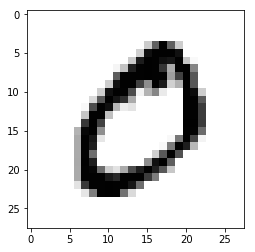

In [8]:
print(y_train[1])

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [9]:
# normalise data - scale 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### Building Model

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2640 - acc: 0.9230
Epoch 2/3
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1093 - acc: 0.9659
Epoch 3/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0722 - acc: 0.9778


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0996 - acc: 0.9681
0.0996178626921028
0.9681


In [12]:
# save and load
# model.save('epic_num_reader.model')
#new_model = tf.keras.models.load_model('epic_num_reader.model')

In [14]:
predictions = model.predict(x_test)
predictions

array([[3.2449810e-09, 1.3503101e-08, 1.2812498e-05, ..., 9.9968493e-01,
        1.1610156e-08, 5.6338145e-06],
       [7.7803497e-09, 8.1346859e-04, 9.9918085e-01, ..., 2.2738892e-08,
        2.4027216e-09, 3.6184507e-11],
       [2.4823797e-07, 9.9970299e-01, 6.6513072e-05, ..., 1.8634884e-04,
        1.3274961e-05, 1.6972280e-07],
       ...,
       [4.6795201e-08, 1.6857136e-06, 8.5324575e-07, ..., 2.3451508e-05,
        1.4307900e-04, 1.2989157e-04],
       [6.1263463e-06, 1.8039927e-06, 8.0770081e-07, ..., 6.3433181e-06,
        2.9081266e-04, 3.1546693e-07],
       [9.4897416e-08, 7.2776750e-08, 3.8926135e-08, ..., 1.8472289e-09,
        3.3250632e-07, 2.1552481e-08]], dtype=float32)

7


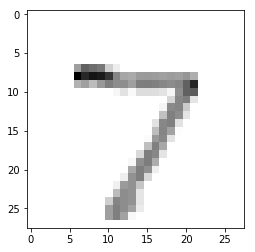

In [17]:
print(np.argmax(predictions[0]))

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

## Dogs and cats dataset

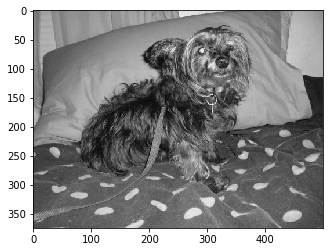

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\Jack\Desktop\PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
img_array

array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8)

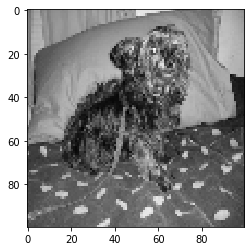

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

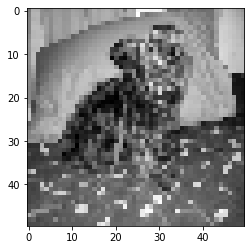

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 12501/12501 [02:30<00:00, 83.26it/s]


24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
0
1
1
0


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[108]
   [108]
   [110]
   ...
   [ 93]
   [ 89]
   [ 80]]

  [[113]
   [112]
   [114]
   ...
   [ 98]
   [111]
   [ 98]]

  [[121]
   [123]
   [128]
   ...
   [102]
   [108]
   [114]]

  ...

  [[ 79]
   [ 81]
   [ 81]
   ...
   [  8]
   [ 22]
   [ 44]]

  [[ 79]
   [ 77]
   [ 78]
   ...
   [  9]
   [ 28]
   [ 41]]

  [[ 96]
   [ 90]
   [ 85]
   ...
   [  8]
   [ 23]
   [ 36]]]]


In [13]:
import pickle

pickle_out = open(r"C:\Users\Jack\Desktop\PetImages\X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(r"C:\Users\Jack\Desktop\PetImages\y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#We can always load it in to our current script, or a totally new one by doing:
#pickle_in = open(r"C:\Users\Jack\Desktop\PetImages\X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open(r"C:\Users\Jack\Desktop\PetImages\y.pickle","rb")
#y = pickle.load(pickle_in)

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

#We can always load it in to our current script, or a totally new one by doing:
pickle_in = open(r"C:\Users\Jack\Desktop\PetImages\X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\Jack\Desktop\PetImages\y.pickle","rb")
y = pickle.load(pickle_in)
y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 510s 29ms/sample - loss: 0.6425 - accuracy: 0.6175 - val_loss: 0.5806 - val_accuracy: 0.7030
Epoch 2/3
17462/17462 [==============================] - 569s 33ms/sample - loss: 0.5456 - accuracy: 0.7293 - val_loss: 0.5169 - val_accuracy: 0.7499
Epoch 3/3
17462/17462 [==============================] - 569s 33ms/sample - loss: 0.4894 - accuracy: 0.7631 - val_loss: 0.4988 - val_accuracy: 0.7598


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Cats-vs-dogs-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir=r"C:\Users\Jack\Desktop\PetImages\{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

model.save('64x3-CNN.model')

## Making predictions

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 70  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]


def prepare(filepath):
    IMG_SIZE = 70  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('doggo.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

## RNNs

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))